In [1]:
import sys

import numpy as np
import pandas as pd

# pip install statsmodels
from statsmodels.tsa.holtwinters import ExponentialSmoothing

import matplotlib.pyplot as plt

sys.path.append("..")
from utils import create_onedrive_directdownload

plt.style.use("ggplot")

In [2]:
onedrive_link = "https://1drv.ms/u/s!AiqdXCxPTydhofYbhA1ASJ6RZ3OjTw?e=Kf4ZBa"
direct_use_link = create_onedrive_directdownload(onedrive_link)
print(direct_use_link)
df = pd.read_csv(direct_use_link, index_col="Month", parse_dates=True)

df.head()

https://api.onedrive.com/v1.0/shares/u!aHR0cHM6Ly8xZHJ2Lm1zL3UvcyFBaXFkWEN4UFR5ZGhvZlliaEExQVNKNlJaM09qVHc_ZT1LZjRaQmE/root/content


,Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [3]:
# no particular reason to choose 0.2
alpha = 0.2

In [7]:
# Set the frequency
df.index.freq = 'MS'

In [8]:
# create training and test set
N_test = 12
train = df.iloc[:-N_test]
test  = df.iloc[-N_test:]

In [9]:
# boolean series to index df rows
train_idx = df.index <= train.index[-1]
test_idx  = df.index > train.index[-1]

In [10]:
hw = ExponentialSmoothing(
    train["Passengers"],
    initialization_method="legacy-heuristic",
    trend = "add",
    seasonal = "add",
    seasonal_periods = 12
)

res_hw = hw.fit()

In [11]:
df.loc[train_idx, "HoltWinters"] = res_hw.fittedvalues

df.loc[test_idx, "HoltWinters"] = res_hw.forecast(N_test)

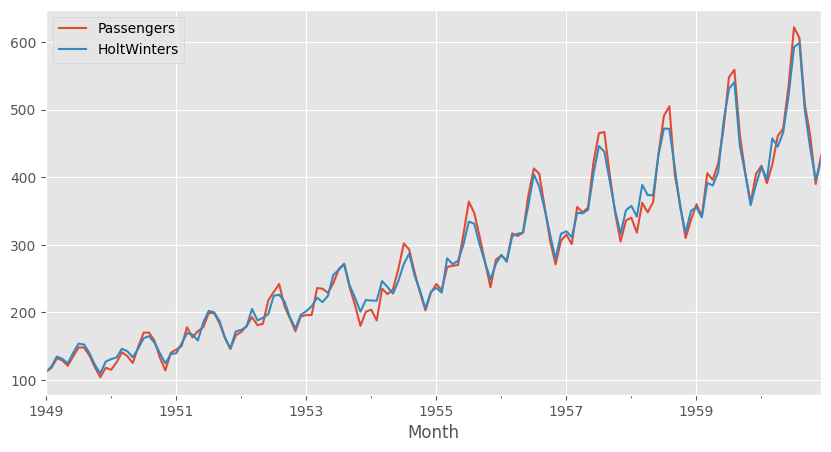

In [12]:
df[["Passengers", "HoltWinters"]].plot(figsize=(10,5));

In [13]:
def rmse(y, t):
    return np.sqrt(np.mean((y - t)**2))

def mae(y, t):
    return np.mean(np.abs(y - t))

In [16]:
print(f"Train RMSE: {round(rmse(train['Passengers'], res_hw.fittedvalues), 2)}")
print(f"Test RMSE: {round(rmse(test['Passengers'], res_hw.forecast(N_test)), 2)}")

Train RMSE: 11.62
Test RMSE: 16.98


In [18]:
print(f"Train MAE: {round(mae(train['Passengers'], res_hw.fittedvalues), 2)}")
print(f"Test MAE: {round(mae(test['Passengers'], res_hw.forecast(N_test)), 2)}")

Train MAE: 9.01
Test MAE: 13.38


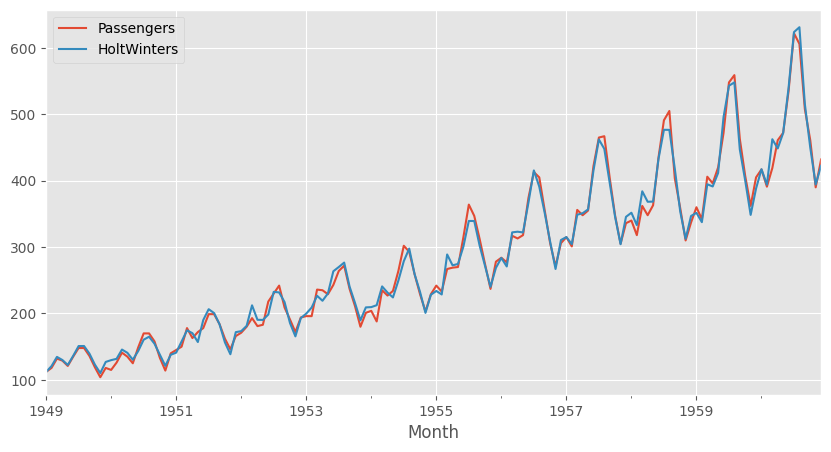

In [20]:
hw = ExponentialSmoothing(
    train["Passengers"],
    initialization_method = "legacy-heuristic",
    trend = "add",
    seasonal = "mul",
    seasonal_periods = 12
)

res_hw = hw.fit()
df.loc[train_idx, "HoltWinters"] = res_hw.fittedvalues
df.loc[test_idx, "HoltWinters"] = res_hw.forecast(N_test)
df[["Passengers", "HoltWinters"]].plot(figsize=(10, 5));

In [21]:
print(f"Train RMSE: {round(rmse(train['Passengers'], res_hw.fittedvalues), 2)}")
print(f"Test RMSE: {round(rmse(test['Passengers'], res_hw.forecast(N_test)), 2)}")

Train RMSE: 9.77
Test RMSE: 15.81


In [22]:
print(f"Train MAE: {round(mae(train['Passengers'], res_hw.fittedvalues), 2)}")
print(f"Test MAE: {round(mae(test['Passengers'], res_hw.forecast(N_test)), 2)}")

Train MAE: 7.6
Test MAE: 10.3


c:\python\python38\lib\site-packages\statsmodels\tsa\holtwinters\model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err


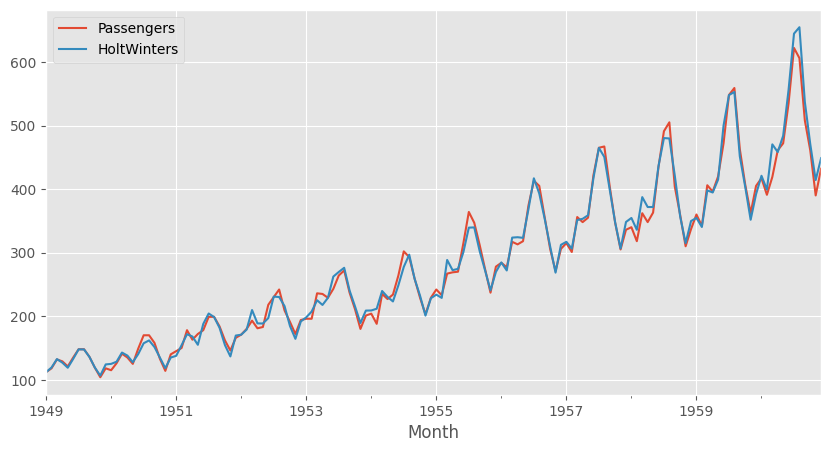

In [23]:
hw = ExponentialSmoothing(
    train["Passengers"],
    initialization_method = "legacy-heuristic",
    trend = "mul",
    seasonal = "mul",
    seasonal_periods = 12
)

res_hw = hw.fit()
df.loc[train_idx, "HoltWinters"] = res_hw.fittedvalues
df.loc[test_idx, "HoltWinters"] = res_hw.forecast(N_test)
df[["Passengers", "HoltWinters"]].plot(figsize=(10, 5));

In [24]:
print(f"Train RMSE: {round(rmse(train['Passengers'], res_hw.fittedvalues), 2)}")
print(f"Test RMSE: {round(rmse(test['Passengers'], res_hw.forecast(N_test)), 2)}")

Train RMSE: 9.62
Test RMSE: 25.81


In [25]:
print(f"Train MAE: {round(mae(train['Passengers'], res_hw.fittedvalues), 2)}")
print(f"Test MAE: {round(mae(test['Passengers'], res_hw.forecast(N_test)), 2)}")

Train MAE: 7.11
Test MAE: 20.84
